<a id = 'toc'></a>
# Table of contents

- ### [Comparing](#6.1)

<a id = '6.1'></a>
# Comparing

In [5]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs, make_circles

import matplotlib.pyplot as plt

%matplotlib inline

In [29]:
train_data = 7 * np.random.random_sample((500, 2)) - np.array([3, 3])

In [37]:
def get_labels(data):
    labels = []
    for idx, item in enumerate(data):
        if item[0]**2 + item[1]**2 < 1:
            labels.append(0)
        elif item[0] > 2 and item[1] > 2:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(labels)

In [39]:
train_labels = get_labels(train_data)

In [46]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, .01)
                       , np.arange(y_min, y_max, .01))

In [58]:
shallow_rf = RandomForestClassifier(n_estimators = 5
                                 , max_depth = 3
                                 , n_jobs = -1
                                 , random_state = 11)

deep_rf = RandomForestClassifier(n_estimators = 5
                                 , max_depth = 6
                                 , n_jobs = -1
                                 , random_state = 11)

shallow_rf.fit(train_data, train_labels)
deep_rf.fit(train_data, train_labels)

RandomForestClassifier(max_depth=6, n_estimators=5, n_jobs=-1, random_state=11)

In [88]:
xx, yy = get_grid(train_data)

predicted_shallow = shallow_rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
predicted_deep = deep_rf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

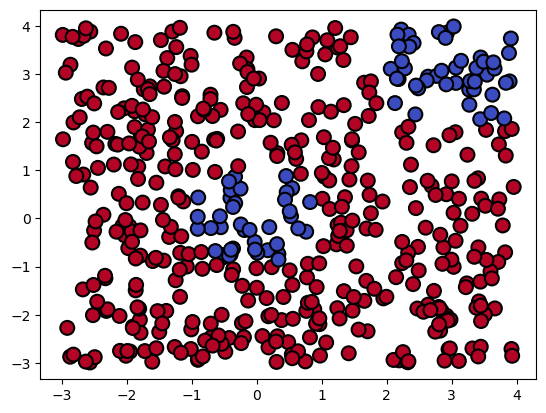

In [89]:
plt.scatter(train_data[:, 0], train_data[:, 1]
            , c = train_labels, s = 100, cmap = 'coolwarm'
            , edgecolors = 'black', linewidth = 1.5)

Text(0.5, 1.0, 'Deep Random Forest')

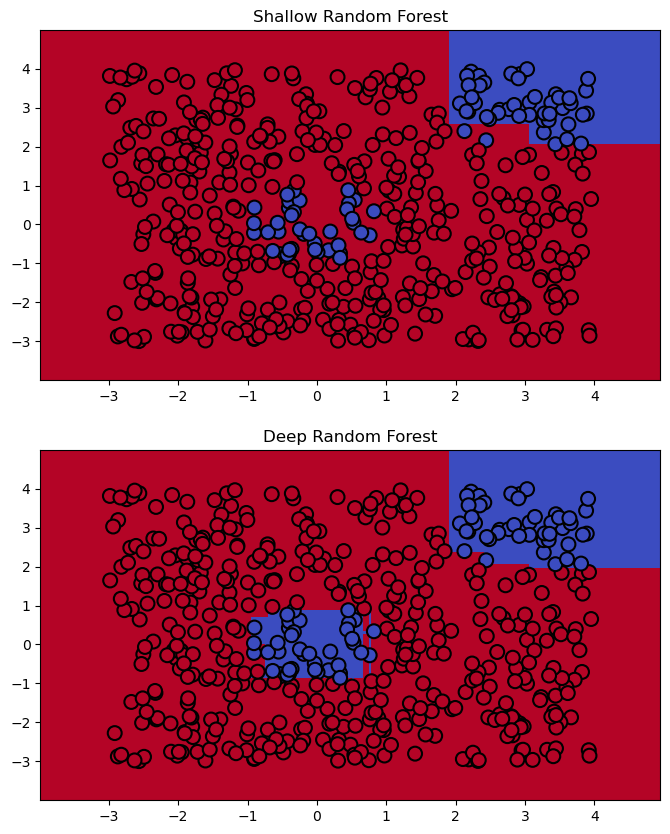

In [94]:
fig, ax = plt.subplots(2, 1, figsize = (8, 10))

ax[0].pcolormesh(xx, yy, predicted_shallow, cmap = 'coolwarm')
ax[0].scatter(train_data[:, 0], train_data[:, 1], c = train_labels
              , s = 100, cmap = 'coolwarm', edgecolors = 'black', linewidth = 1.5)
ax[0].set_title('Shallow Random Forest')

ax[1].pcolormesh(xx, yy, predicted_deep, cmap = 'coolwarm')
ax[1].scatter(train_data[:, 0], train_data[:, 1], c = train_labels
              , s = 100, cmap = 'coolwarm', edgecolors = 'black', linewidth = 1.5)
ax[1].set_title('Deep Random Forest')

[UP](#toc)

[UP](#toc)